In [250]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

img.shape shows the (x-coordination, y-coordination and rgb channels)

In [251]:
img = cv2.imread('./test_images/njr-8.jpg')
img.shape 

(183, 275, 3)

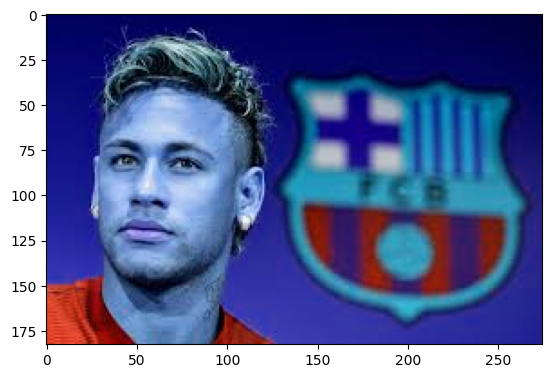

In [252]:
plt.imshow(img)

gray removes rgb channels as there will be no rgb color in gray representation

In [253]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(183, 275)

In [254]:
gray

array([[28, 28, 28, ..., 16, 16, 16],
       [28, 28, 28, ..., 16, 16, 16],
       [28, 28, 28, ..., 17, 17, 17],
       ...,
       [84, 70, 58, ..., 66, 66, 66],
       [65, 78, 91, ..., 66, 66, 66],
       [78, 71, 65, ..., 66, 66, 66]], shape=(183, 275), dtype=uint8)

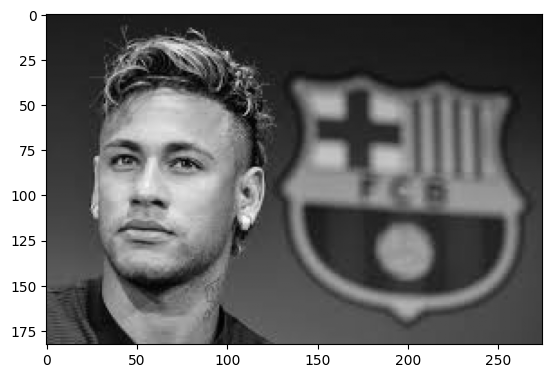

In [255]:
plt.imshow(gray,cmap='gray')

for detecting the face using haarcascade gives (x,y,width_of_face, height)


In [256]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[13, 46, 93, 93]], dtype=int32)

In [257]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(13), np.int32(46), np.int32(93), np.int32(93))

cv2.rectangle(image, start_point, end_point, color, boldeness of rectangle)

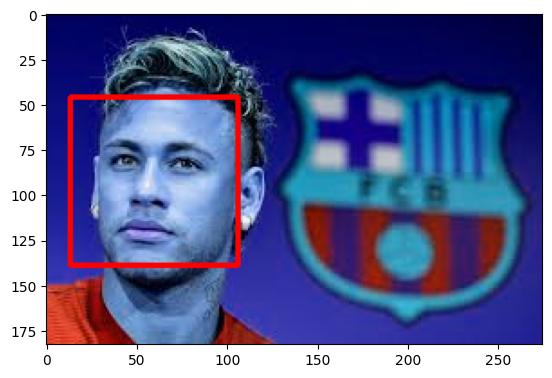

In [258]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

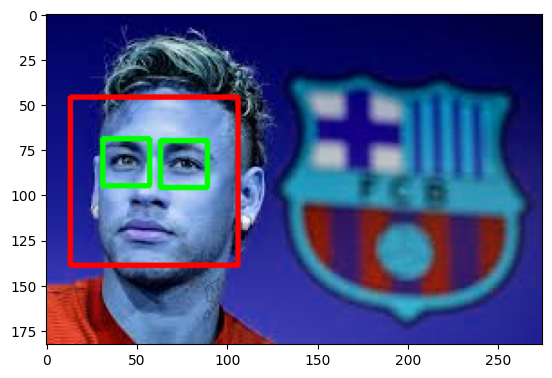

In [259]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces: #iterating through all faces
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #selecting or drawing face image
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(
    roi_gray,
    scaleFactor=1.1,
    minNeighbors=7,      # More neighbors = fewer false detections
    minSize=(20, 20),    # Skip tiny detections
    flags=cv2.CASCADE_SCALE_IMAGE
)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

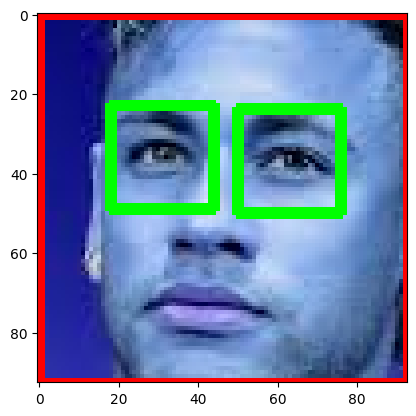

In [260]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [261]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not found or unreadable: {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 2:
            return roi_color

    return None  # No face with 2 eyes found

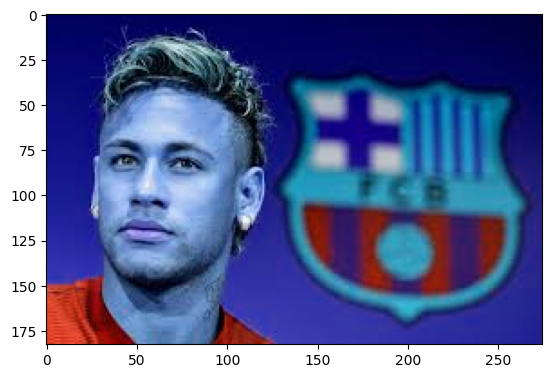

In [262]:
original_image = cv2.imread('./test_images/njr-8.jpg')
plt.imshow(original_image)

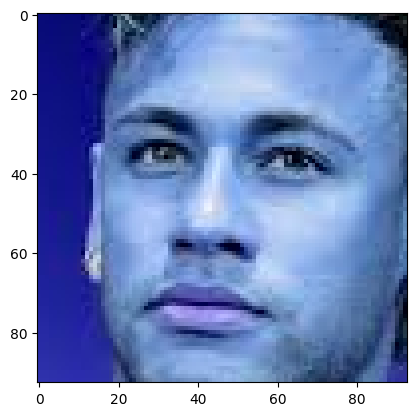

In [263]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/njr-8.jpg')
plt.imshow(cropped_image)

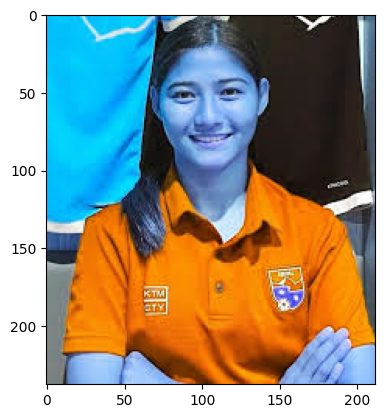

In [264]:
org_image_obstructed = cv2.imread('./test_images/arm-1.jpg')
plt.imshow(org_image_obstructed)

In [265]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/arm-1.jpg')
cropped_image_no_2_eyes

In [266]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [267]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [268]:
img_dirs

['./dataset/anjana',
 './dataset/neymar',
 './dataset/sandeep',
 './dataset/sanduk_ruit']

In [269]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [270]:
cropped_image_dirs = []
person_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    person_name = img_dir.split('/')[-1]
    person_file_names_dict[person_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + person_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = person_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            person_file_names_dict[person_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/anjana
Generating cropped images in folder:  ./dataset/cropped/neymar
Generating cropped images in folder:  ./dataset/cropped/sandeep
Generating cropped images in folder:  ./dataset/cropped/sanduk_ruit


In [271]:
person_file_names_dict

{'anjana': ['./dataset/cropped/anjana/anjana1.png',
  './dataset/cropped/anjana/anjana2.png',
  './dataset/cropped/anjana/anjana3.png',
  './dataset/cropped/anjana/anjana4.png',
  './dataset/cropped/anjana/anjana5.png',
  './dataset/cropped/anjana/anjana6.png'],
 'neymar': ['./dataset/cropped/neymar/neymar1.png',
  './dataset/cropped/neymar/neymar2.png',
  './dataset/cropped/neymar/neymar3.png',
  './dataset/cropped/neymar/neymar4.png'],
 'sandeep': ['./dataset/cropped/sandeep/sandeep1.png',
  './dataset/cropped/sandeep/sandeep2.png',
  './dataset/cropped/sandeep/sandeep3.png',
  './dataset/cropped/sandeep/sandeep4.png'],
 'sanduk_ruit': ['./dataset/cropped/sanduk_ruit/sanduk_ruit1.png',
  './dataset/cropped/sanduk_ruit/sanduk_ruit2.png',
  './dataset/cropped/sanduk_ruit/sanduk_ruit3.png',
  './dataset/cropped/sanduk_ruit/sanduk_ruit4.png']}